<font size="5">**Exploratory Data Analysis**</font>

The dataset consists of historical sales data of an Electronics shop where 20 different products are being sold in different number of quantity from january 2019 to september 2019.

## Objective

1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.
2. Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.
3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset wherever modifications are made.

4. Answer the following questions using the clean dataset by plotting suitable graphs:
  
  a. What is the distribution of sales among different cities in different months?
 
  b. Which city had the highest sales overall?

  c. Which Month had the highest amount of sales overall?

  d. Most bought products per city.

Based on your analysis, suggest a city for establishing a new branch for the retail store backed with proper reasoning.

5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) 

Based on your analysis, suggest the best working hours and for the retail store.

6. Find out the pair of products that are most sold together. For example, generally, we would expect a person who buys an iPhone 11 to also buy the Apple Airpods together with it. Identify such pairs of products and suggest what promotional offers should the retail company come up with based on your outcome.

**1. Load the dataset into pandas and provide a summary of columns in the loaded dataset without any modification.**

In [35]:
#Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
#loading the data set
raw_data = pd.read_csv(r"C:\Users\DELL\Desktop\data\all_data_copy.csv") #reading the dataset
raw_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Summary of the variables and the variable description is given below:

1. Order ID:           Computer generated Order ID of a particular purchase
2. Product:            Product being purchased
3. Quantity Ordered:   Number of Quantity purchased by customer
4. Price Each:         Price of each product in $
5. Order Date:         Date and time of the item purchased from january 2019 to september 2019
6. Purchase Address:   Customer's address who purchased

**2. Prepare the data frame for further analysis. Clean it, mold it in any manner you see fit.**

In [37]:
#Creating a copy of data to work on
df = raw_data.copy()

In [38]:
df.head(10) #Getting first ten rows 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [39]:
df.tail(10) #Getting last ten rows 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
373690,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001"
373691,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
373692,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"
373693,259351,Apple Airpods Headphones,1,150,09/01/19 19:43,"981 4th St, New York City, NY 10001"
373694,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016"
373695,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
373699,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [40]:
df.describe() #Finding the mean, max, min, and std deviation

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,372610,372610,372610,372610,372610,372610
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806,710,710


In [41]:
df.info() #Display number of rows, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 17.1+ MB


In [42]:
df.shape #Get the number of rows and columns

(373700, 6)

In [43]:
df.size #Get the number of elements

2242200

In [44]:
df.dtypes #Getting the data type of each column

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [45]:
df.isnull().sum() #Getting the total null values in each column.

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [46]:
df.nunique() #getting no. of unique values

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [47]:
df = df.dropna(how = 'all')  #dropping all null values

In [48]:
df.duplicated(subset= None, keep = 'first') #finding duplicate data

0         False
1         False
2         False
3         False
4         False
          ...  
373695     True
373696     True
373697     True
373698     True
373699     True
Length: 372610, dtype: bool

In [49]:
df= df.drop_duplicates() #removing duplicate data

In [50]:
df1 = df[df['Order Date'].str[0:2]=='Or']
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [51]:
df = df[df['Order Date'].str[0:2]!='Or']
#print(df.loc[[1073]])

In [52]:
#As we need monthly and hourly data, we have to convert and add a new columns named as Hour and Month
df['Order Date'] = df['Order Date'].astype('datetime64')
df['Hour'] = (df['Order Date']).dt.hour
df['Month'] = (df['Order Date']).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",13,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",20,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11,1


In [53]:
#Adding a 'City' column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x)+' '+ get_state(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,City
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,1,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14,1,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",13,1,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",20,1,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11,1,Austin TX


In [54]:
#Converting 'Quantity Ordered' and 'Price Each' into Numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

#Adding Sales Column
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,City,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,1,Boston MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14,1,Portland OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",13,1,San Francisco CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",20,1,Los Angeles CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11,1,Austin TX,11.99


In [55]:
df.describe() #Finding the mean, max, min, and std deviation

,Quantity Ordered,Price Each,Hour,Month,Sales
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,14.412934,7.058653,185.611936
std,0.443069,332.843838,5.423329,3.502932,333.032118
min,1.000000,2.990000,0.000000,1.000000,2.990000
25%,1.000000,11.950000,11.000000,4.000000,11.950000
50%,1.000000,14.950000,15.000000,7.000000,14.950000
75%,1.000000,150.000000,19.000000,10.000000,150.000000
max,9.000000,1700.000000,23.000000,12.000000,3400.000000


max quantity ordered is 9

In [56]:
 df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,City,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",21,1,Boston MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14,1,Portland OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",13,1,San Francisco CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",20,1,Los Angeles CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11,1,Austin TX,11.99


**3. Provide a summary of the cleaned dataset along with some preliminary analysis and contrast it with the uncleaned dataset        wherever modifications are made.**

1. As we could now see in the cleaned and modified data we have dropped all null values.
3. Changed Object data types to necessary required data types, like numericals and date-time format.
4. We had a column of address, we split that column into a column of City and also Order date into Hour and month.
5. We will need sales column, so we added a new column called Sales by multiplying Quantity ordered and Price each.
6. We dropped duplicate values.


**4. Distribution of Sales among different cities in different months**

4.1 What is the distribution of sales among different cities in different months?

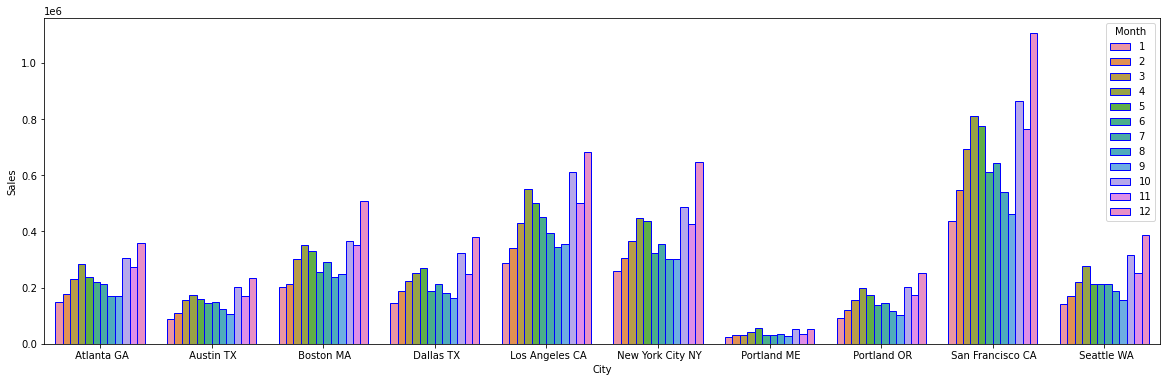

In [57]:
dist_sales = df.groupby(['City','Month']).agg({'Sales':'sum'}).reset_index()
plt.figure(figsize=(20,6))
t= sns.barplot(x='City', y='Sales', hue='Month', data=dist_sales, edgecolor='b')
plt.show()

**4.2 Which city had the highest sales overall?**

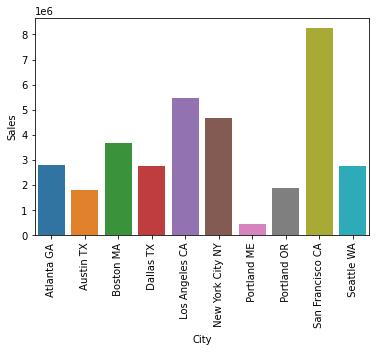

In [58]:
city_sales=df.groupby(['City']).agg({'Sales':'sum'}).reset_index()
j=sns.barplot(x='City',y='Sales',data=city_sales)
plt.xticks(rotation='vertical')
plt.show()

San francisco has highest no. of sales

**4.3 Which month had the highest sales?**

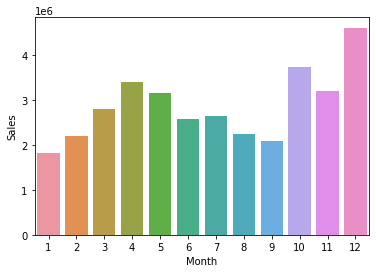

In [59]:
month_sales=df.groupby(['Month']).agg({'Sales':'sum'}).reset_index()
j=sns.barplot(x='Month',y='Sales',data=month_sales)
plt.show()

December has highest amount of sales.

**4.4 Most bought products per city.**

<AxesSubplot:title={'center':'Most bought products per city'}, xlabel='City', ylabel='count'>

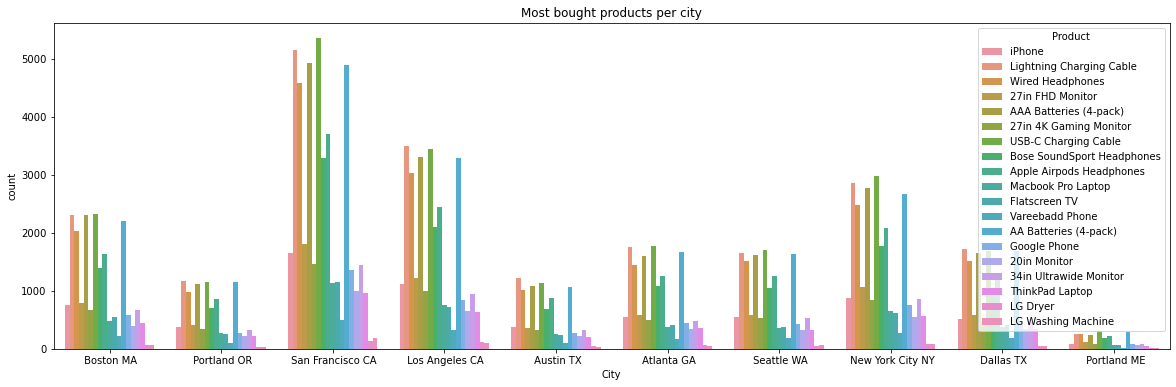

In [60]:
plt.figure(figsize=(20, 6)) ##managing size
plt.title('Most bought products per city') #giving title 
sns.countplot(df['City'], hue = df.Product) #plotting count plot

Now we can clearly analyse which product is mostly bought in which city like in Los angeles CA AA Batteries(4 pack) is mostly bought by the customers 

Based on the analysis we can say that the branch of super market should be open in san francisco CA because it has maximum sales and in the month of December as there are maximum sales in December .

**5. Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night)**

In [61]:
day_sales = df['Order Date'].dt.hour.map(lambda x: 'Midnight' if 0<=x<5 else 'Morning' if 5<=x<11 else 'Noon' if 11<=x<16 else 'Evening' if 16<=x<20 else 'Night')

In [62]:
values = day_sales.value_counts(sort=False).values

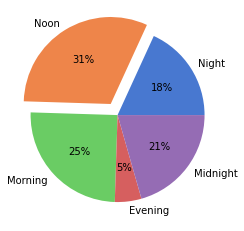

In [63]:
explode = [0 if x<max(values) else 0.15 for x in values]
plt.pie(values,labels=day_sales.unique(),colors=sns.color_palette('muted'), autopct='%.0f%%', explode = explode)
plt.show()

All the Products are mostly sold in the Noon.

**6. What Products are most often Sold together?**

In [64]:
(df.groupby('Order ID')['Product'].count()==2).value_counts()

False    171911
True       6526
Name: Product, dtype: int64

**Creating Group of Products Ordered together**

In [65]:
# Create New Data Frame containig only Multiple Products with Same Order ID.
order = df[df['Order ID'].duplicated(keep = False)] 
order.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Month,City,Sales
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",16,1,Austin TX,11.95
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",16,1,Austin TX,11.99
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",8,1,Los Angeles CA,150.00
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",8,1,Los Angeles CA,11.52
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",11,1,New York City NY,400.00
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",11,1,New York City NY,11.99
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",0,1,Boston MA,600.00
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",0,1,Boston MA,11.95
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",11,1,San Francisco CA,600.00
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",11,1,San Francisco CA,99.99


In [66]:
order['Ordered Together'] = order.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
order = order[['Order ID','Ordered Together']].drop_duplicates()
order.head(10)

,Order ID,Ordered Together
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [67]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in order['Ordered Together']:
    items = row.split(',')
    count.update(Counter(combinations(items,2))) # Most Common Pair of Products Bought Together.

for key, value in count.most_common(10): # Top 10 Products Pair Bought Together.
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Based on the Group of Items Bought Together, Offers can be Provided to Attract more Customers.
e.g. If a Person Buy Iphone, Discount Offers on Lightning Charging Cable.

**Overall Summary**

San francisco has highest no. of sales.
In december there is highest no. of sales.
Max product sold between in Noon.
iphone, Airphone,headphone should be sold together with discount for maximum sales.